In [2]:
import intake
from matplotlib import pyplot as plt
import panel as pn
import hvplot.xarray  # noqa
import cartopy.crs as ccrs
import cartopy.feature as cfeature

hvplot.extension('matplotlib')

In [3]:
catalog_anl = intake.open_catalog('http://ftp1.cptec.inpe.br/pesquisa/das/carlos.bastarz/GSIMonitor/anls/catalog_anl.yml')
catalog_bkg = intake.open_catalog('http://ftp1.cptec.inpe.br/pesquisa/das/carlos.bastarz/GSIMonitor/anls/catalog_bkg.yml')

In [4]:
catalog_anl

catalog_anl:
  args:
    path: http://ftp1.cptec.inpe.br/pesquisa/das/carlos.bastarz/GSIMonitor/anls/catalog_anl.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [5]:
catalog_anl['2024032200']

'2024032200':
  args:
    consolidated: true
    urlpath: https://s0.cptec.inpe.br/pesquisa/das/dist/carlos.bastarz/GSIMonitor/anls/2024032200/GFCTCPT20240322002024032200F.icn.TQ0299L064.zarr
  description: SMNA Analysis for 2024032200
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: http://ftp1.cptec.inpe.br/pesquisa/das/carlos.bastarz/GSIMonitor/anls
    tags:
    - atmosphere
    - analysis
    - data_assimilation
    - smna
    - field
    url: https://s0.cptec.inpe.br/pesquisa/das/dist/carlos.bastarz/GSIMonitor/anls/2024032200


In [6]:
dset_anl = catalog_anl['2024032200'].to_dask()
dset_bkg = catalog_bkg['2024032200'].to_dask()

/home/carlos/miniconda3/envs/GSIMonitor/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [7]:
anl_vars = list(dset_anl.variables)
anl_vars.remove('lat')
anl_vars.remove('lon')
anl_vars.remove('lev')

bkg_vars = list(dset_bkg.variables)
bkg_vars.remove('lat')
bkg_vars.remove('lon')
bkg_vars.remove('lev')

:Overlay
   .Polygons.I  :Polygons   [lon,lat]   (SPECIFIC HUMIDITY)
   .Coastline.I :Feature   [Longitude,Latitude]
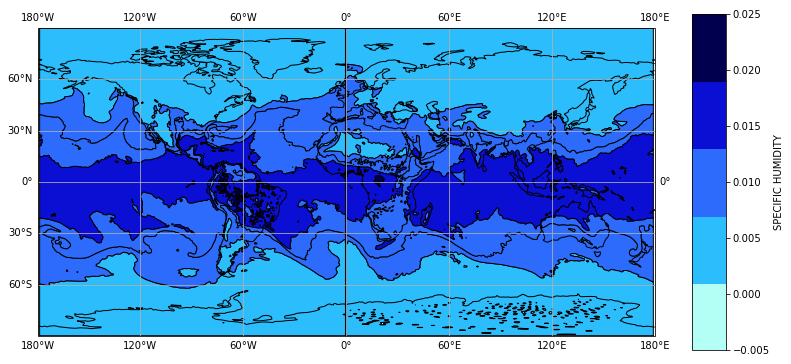

In [8]:
dset_anl["SPECIFIC HUMIDITY"].hvplot.contourf(x="lon", y="lat", geo=True, coastline=True, height=1000, grid=True)

:Overlay
   .Polygons.I  :Polygons   [lon,lat]   (SPECIFIC HUMIDITY)
   .Coastline.I :Feature   [Longitude,Latitude]
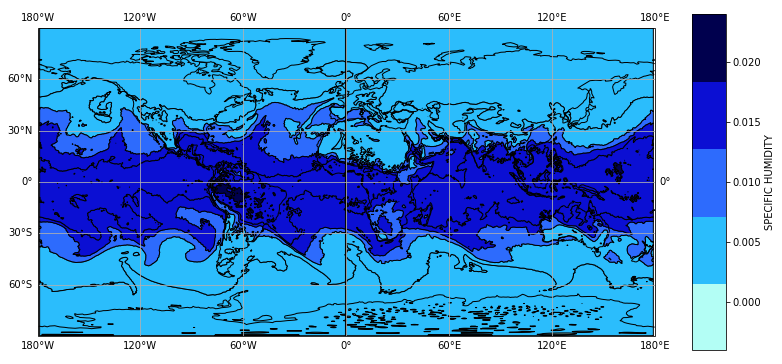

In [9]:
dset_bkg["SPECIFIC HUMIDITY"].hvplot.contourf(x="lon", y="lat", geo=True, coastline=True, height=1000, grid=True)

:Overlay
   .Polygons.I  :Polygons   [lon,lat]   (SPECIFIC HUMIDITY)
   .Coastline.I :Feature   [Longitude,Latitude]
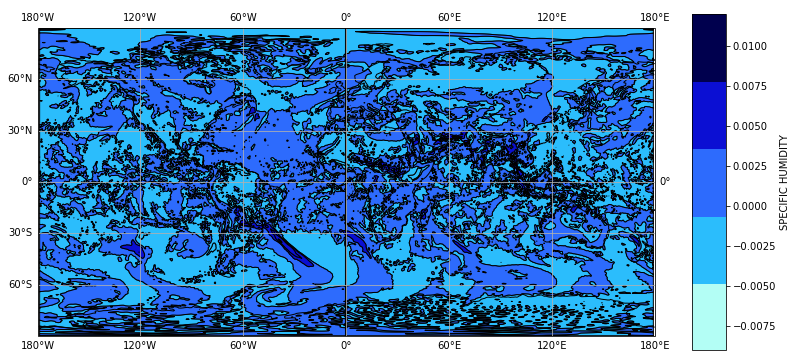

In [10]:
(dset_anl["SPECIFIC HUMIDITY"]-dset_bkg["SPECIFIC HUMIDITY"]).hvplot.contourf(x="lon", y="lat", geo=True, coastline=True, height=1000, grid=True)

In [11]:
variables = pn.widgets.Select(name='Variables', options=anl_vars, value=anl_vars[0])

In [12]:
dset_bkg["DIVERGENCE"].hvplot.contourf(x="lon", y="lat", geo=True, coastline=True, height=1000, grid=True)

ModuleNotFoundError: No module named 'jupyter_bokeh'

:DynamicMap   [lev]